In [98]:
#import libraries to be used
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs

In [103]:
html_code = """
<html>
<head>
<title>Page Title</title>
<head>
<body>
<h1>Heading 1/h1>
<p class="style">Paragraph 1</p>
<p class="style">Paragraph 2</p>
<a href="https://www.google.com/" class="Alphabet" id="link1">Google</a>
<a href="https://www.google.com/doodles" class="Alphabet" id="link2">Doodle</a>
</body>
</html>"""

In [105]:
soup = bs(html_code, "html.parser")

In [116]:
s = bs(r'<p class="style">Paragraph 1</p>', "html.parser")

In [121]:
print(s.p)
print(type(s.p))

<p class="style">Paragraph 1</p>
<class 'bs4.element.Tag'>


In [138]:
print(soup.a['id'])
print(soup.a['class'])

link1
['Alphabet']


In [139]:
soup.find_all('a')

[<a class="Alphabet" href="https://www.google.com/" id="link1">Google</a>,
 <a class="Alphabet" href="https://www.google.com/doodles" id="link2">Doodle</a>]

In [143]:
print(soup.find_all('a', attrs={'href':'https://www.google.com/'}))
print(soup.find_all('a', attrs={'id':'link2'}))
print(soup.find_all('p', attrs={'class':'style'}))

[<a class="Alphabet" href="https://www.google.com/" id="link1">Google</a>]
[<a class="Alphabet" href="https://www.google.com/doodles" id="link2">Doodle</a>]
[<p class="style">Paragraph 1</p>, <p class="style">Paragraph 2</p>]


### Web Scraping           
Web scraping a process of gathering data from the internet for automating processes. It's important to read terms of services for the website before scraping the data as some websites make it illigal to scrap data from their websites.          
The python libraries requests and Beautiful Soup are powerful tools to scrap data from web.        

### Scrape the Indeed job website to get insight into jobs            
In this tutorial, we will build a web scraper that fecthes data analyst job listing from the indeed website. For this, our scraper will parse the HTML on the site to pick out the relevent information and filter that content for specific words.       
#### Explore the website          
First, we have to understand the structure of site in order to scrap the data that is relevent to us.   
On the Indeed website we can see the user interface of the website as shown in figure below. Also, we can see that when we interact with the website, URL of the website changes.        
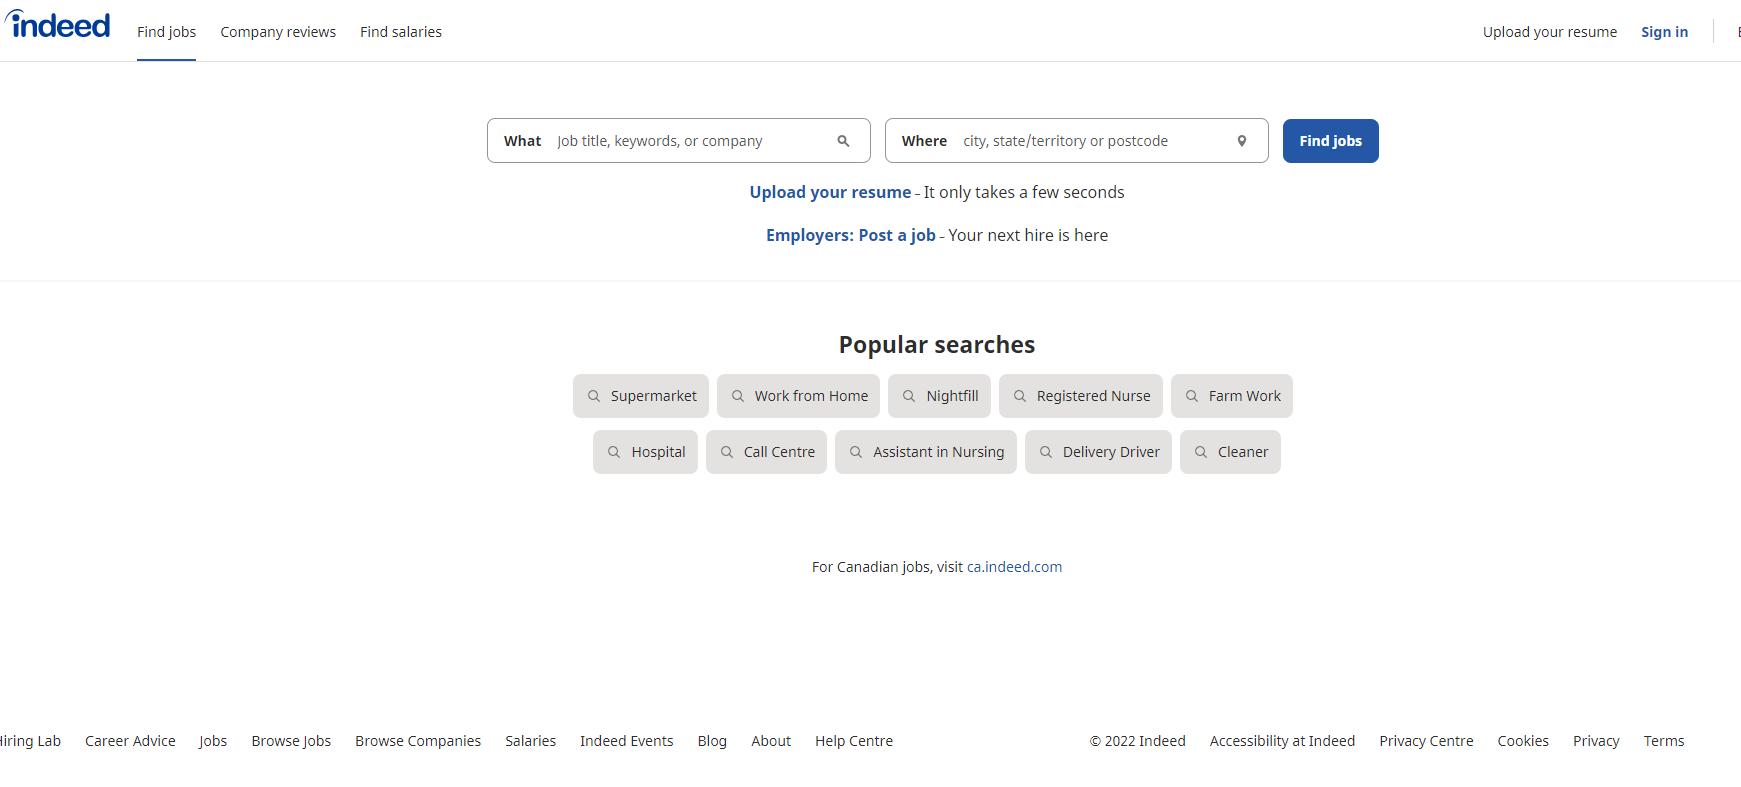               

Let's see the job postings related to data analyst jobs in Toronto. We get the following link when we query this data.            
https://ca.indeed.com/jobs?q=data%20analyst&l=Toronto%2C%20ON&vjk=b038e0902d2b6069            
This link has two components             
1. The base URL: this represents the path to the search fnctionality of the website. In the above example, the base url is https://ca.indeed.com/jobs           
2. Query parameter: This encodes values of the serach by user. This can be think of as a query string that is sent to the database to retrieve specific words.  \         
Query parameters have three components:               
i. Start: The beginning of the query parameter is denoted by a question mark(?)           
ii. Information: The pieces of information constituting one query parameter are encoded in key-value chain pair, wher related keys and values are joined together by an equal sign (key=value)         
iii. Separator: A URL can have multiple query parameters, separated by an ampersand symbol(&).      
So in the above link first query selects the type of job (q=data%20analyst)           
The second query selects the location for the job (l=Toronto%2C%20ON)                  

##### Inspect the website using developer tool            
Here we have to understand the page structure in order to pick the information we want. Open the web developer tool in python and explore different parts of the page using the developer tool.
 


In [159]:
URL = 'https://ca.indeed.com/jobs?q=%22data%20Analyst%22&l=Toronto%2C%20ON&radius=100&vjk=2df6fdc95e751077'
page = req.get(URL) #get request to the URL and store the content of URL in python object page


In [160]:
#check page object to see if the URL worked 
print(page.text)

<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
<meta http-equiv="content-type" content="text/html;charset=UTF-8">
<script id="polyfill-script-bundle">/* Polyfill service DEVELOPMENT MODE - for live use set NODE_ENV to 'production'
 * Disable minification (remove `.min` from URL path) for more info */

(function(self, undefined) {function ArrayCreate(r){if(1/r==-Infinity&&(r=0),r>Math.pow(2,32)-1)throw new RangeError("Invalid array length");var n=[];return n.length=r,n}function Call(t,l){var n=arguments.length>2?arguments[2]:[];if(!1===IsCallable(t))throw new TypeError(Object.prototype.toString.call(t)+"is not a function.");return t.apply(l,n)}function Get(n,t){return n[t]}function HasOwnProperty(r,t){return Object.prototype.hasOwnProperty.call(r,t)}function HasProperty(n,r){return r in n}function IsArray(r){return"[object Array]"===Object.prototype.toString.call(r)}function IsCallable(n){return"function"==typeof n}function RequireObjectCoercible(e){if(null===e||e===undefined)throw T

In [161]:
#parse the html text in page object using beautifulsoup's html parser
soup = bs(page.text, "html.parser")

We can see in the figure below that the card containing information (company name, job title) is located within 'td' tag and class 'resultContent'              
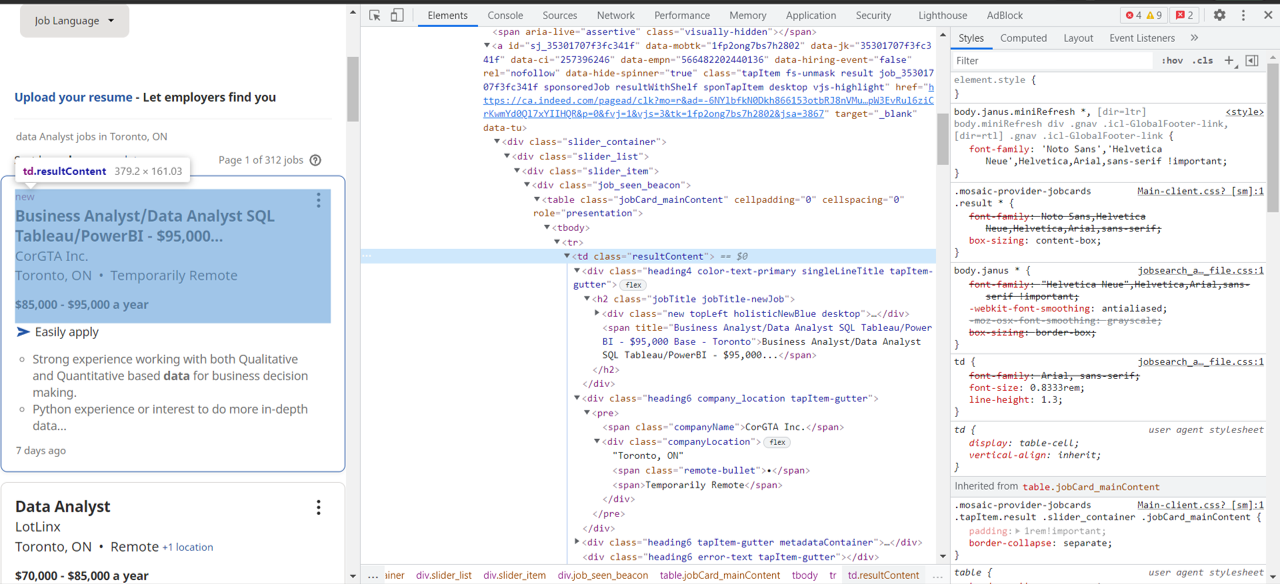             


In [162]:
#store data from this card in a list res
res = soup.find_all('td', 'resultContent')

In [163]:
#job title is located as a string in span tag which is a child of h2 tag. h2 tag is child of td tag.
#similarly company name is located as a string in span tag which is child of pre tag. pre tag is child of td tag
#We can find the tags for different variables in a similar fashion.
print(res[0].find('h2').text.replace('new','')) #job title
print(res[0].pre.span.string) #company name
print(res[5].find('div', 'salary-snippet').get('aria-label')) #salary 
print(soup.find_all('span', 'date')[0].text) #job posting date

Data Analyst
Loblaw Companies Limited
$22.65 to $24.56 an hour
Posted1 day ago


In [165]:
res[0].find('h2').text

'newData Analyst'

In [86]:
#let us store the result of each variable for every job on a page in a list
job_title = []
company = []
location = []
salary = []
date = []
def one_page(res, job_title, company, location, salary, date):
    for element in res:
        job_title.append(element.find('h2').text.replace('new',''))
        company.append(element.pre.span.string)
        location.append(element.find('div', 'companyLocation').text)
        try:
            salary.append(element.find('div', 'salary-snippet').get('aria-label'))
        except AttributeError:
            salary.append('')
    for dat in soup.find_all('span', 'date'):
        date.append(dat.text)
    return (job_title, company, location, salary, date)

In [87]:
#data for one page
print(job_title)
print(company) 
print(location) 
print(salary)
print(date) 

[]
[]
[]
[]
[]


In [88]:
#let's collect data for all the pages (i am collecting data for first 29 pages). If you want
#to collect data for all the pages you can use while loop instead of for loop.
for i in range(20):
    one_page(res, job_title, company, location, salary, date)
    try:
        url = 'https://ca.indeed.com' + soup.find_all('a', {'aria-label':'Next'})[0].get('href')
    except:
        break
    page = req.get(url)
    soup = bs(page.text, "html.parser")
    res = soup.find_all('td', 'resultContent')

In [92]:
#This data contains total 270 values 
len(job_title)

270

In [94]:
#store data for data analyst jobs in Toronto in a data frame
df_jobs = pd.DataFrame(data={'Job_title':job_title, 'Company':company, 'Location':location, 'Salary':salary, 'Date':date})

In [96]:
df_jobs.head()

,Job_title,Company,Location,Salary,Date
0,Data Analyst,LotLinx,"Toronto, ON+1 location•Remote","$70,000 to $85,000 a year",Posted30+ days ago
1,Business Analyst/Data Analyst SQL Tableau/Powe...,CorGTA Inc.,"Toronto, ON•Temporarily Remote","$85,000 to $95,000 a year",Posted8 days ago
2,Data Analyst/ Specialist,Manpower,"Toronto, ON",$17 to $22 an hour,Posted6 days ago
3,Profit and Data Analyst,UPS SCS Inc.,"Mississauga, ON•Remote",$22.65 to $24.56 an hour,Posted6 days ago
4,Data Analyst,EDAC INC.,"Markham, ON•Temporarily Remote","$46,000 to $65,000 a year",Posted6 days ago


In [97]:
#export data to csv for later use
df_jobs.to_csv(r'E:\Machine Learning Engineer\Medium Articles\Beautiful Soup\job_data.csv')